# course 2 (2/26)

## 主成分分析(PCA)

### 理論推導
處理問題: $X$變數太多、每個$X$有相關性。
>沒有處理的負面影響: garbage in garbage out

$\longrightarrow$解法: 把資料變數篩選(資料前處理Pre-Processing)，篩出$q$個有用的變數。


| $X_1$    | $X_2$ | ... |$X_p$ |
| -------- | ------- |------- |------- |
| $\downarrow$  |$\downarrow$    | $\vdots$| $\downarrow$ |
| $Z_1$ | $Z_2$     | ...|  $Z_p$     |

where $Z_i$不相關，$\sigma _{Z_1}^2>\sigma _{Z_2}^2>...>\sigma _{Z_p}^2$

- 總訊息能量不變:$\sigma^2_{X_1}+\sigma^2_{X_2}+\dots+\sigma^2_{X_1p} = \sigma^2_{Z_1}+\sigma^2_{Z_2}+...+\sigma^2_{Z_p}$
    - 風險: 損失部分訊息
    $$\frac{\sigma^2_{Z_1}+\sigma^2_{Z_2}+...+\sigma^2_{Z_q}}{\sum_{i = 1}^{p} \sigma_{X_i^2}^2 }$$


Q: $Z_i$從何而來?

Ans. 參照講義py_book_pca_fundamental.pdf DP3.。原理:假設$E(Z_i)=0$，將$Z_1...Z_p$寫成$X_1...X_p$的線性組合，使得$E(Z_iZ_j)=0$, $i\neq j$


$Z=\begin{pmatrix}
Z_1 \\
Z_2 \\
\vdots \\
Z_p
\end{pmatrix} =\begin{pmatrix}
\alpha _{11} &\alpha _{12} &\dots &\alpha _{1p}  \\
Z_2  &\ddots &  & \vdots\\
\vdots & &\ddots  & \vdots \\
Z_p & \dots &\dots & Z_{pp}
\end{pmatrix}$ $\begin{pmatrix}
X_1 \\
X_2 \\
\vdots \\
X_p
\end{pmatrix}=Ax$

A = $Z$的共變異矩陣，i.e:

$\sum_Z = Cov(Z)=E(ZZ^T)$

$=E\left\{ \begin{pmatrix}
Z_1 \\
Z_2 \\
\vdots \\
Z_p
\end{pmatrix}
\begin{pmatrix}Z_1 & Z_2 &\dots &Z_p\end{pmatrix}\right\}=
\begin{pmatrix}
E(Z_{1}^2) &0 &\dots &0 \\
0 &E(Z_{2}^2) &  & \vdots\\
\vdots & &\ddots  & 0 \\
0 & \dots &0 & E(Z_{p}^2)
\end{pmatrix}$ 
$= E(Ax(Ax)^T)= E(Axx^TA^T)$

做特徵分解

$\sum_Z = A\sum_x A^T$

其中$\sum_Z裡的變異數可以依特徵值由大到小排列$

### 結論

$A^T = \begin{pmatrix} v_1 & v_2 & \dots & v_p \end{pmatrix}$, $\sum_x v_k = \lambda v_k$

$\downarrow$

$A =  \begin{pmatrix}
v_1^T \\
v_2^T \\
\vdots \\
v_p^T
\end{pmatrix}$






### 實作

In [4]:
import requests as rq
import pandas as pd
from io import BytesIO

# github要raw data才可以讀取線上資料
url = "https://raw.githubusercontent.com/ntpuccw/InClassCoding/refs/heads/main/data/city_quality.xlsx"
data = rq.get(url).content
df = pd.read_excel(BytesIO(data), engine="openpyxl")
df.head()
# df.describe() # 顯示資料的統計資訊
# df.info # 顯示資料的資訊
# df.shape  #  顯示資料的維度 (row, column)

,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


In [5]:
df.columns

Index(['climate       ', 'housing       ', 'health        ', 'crime         ',
       'transportation', 'education     ', 'arts          ', 'recreation    ',
       'economics     '],
      dtype='object')

小知識:第一次跑比較久的原因

> 系統正把package從硬碟轉至記憶體，第二次以後package已經在記憶體(RAM)了，所以會比較快

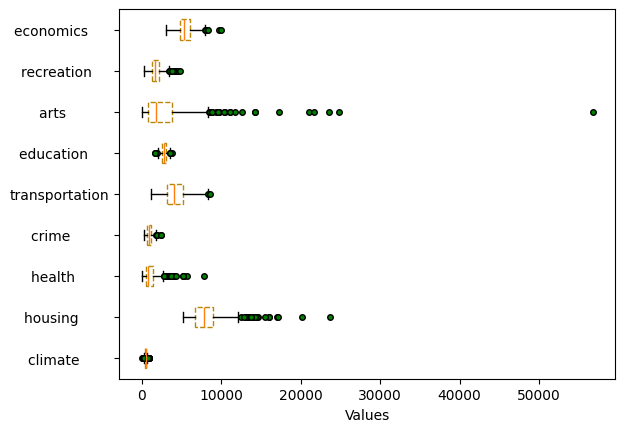

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# 畫盒鬚圖
ratings = np.array(df)
categories = df.columns

# 創建一個圖形和一個子圖（軸）對象，fig 是圖形對象，ax 是軸對象。
fig, ax = plt.subplots() 
# 定義了箱形圖的外觀屬性，使用虛線、線寬為1、顏色為深金色。
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
# 定義了異常值（離群值）的外觀屬性，使用圓形標記、標記顏色為綠色、標記大小為4、無線條。
fierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none')

# 繪製箱形圖，使用之前定義的箱形圖屬性、異常值屬性、標籤，並且圖形是水平的（vert=False）。
ax.boxplot(ratings, boxprops=boxprops, flierprops=fierprops,\
           tick_labels=categories, vert=False)
ax.set_xlabel('Values')
plt.show()

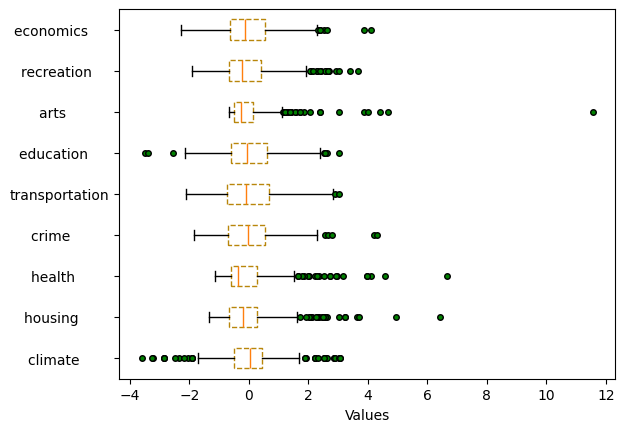

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 計算mean和std(標準化)
scaler.fit(ratings)
# Apply
ratings_ = scaler.transform(ratings)
ratings = pd.DataFrame(ratings_, columns=categories)

# 畫盒鬚圖
fig, ax = plt.subplots() 
ax.boxplot(ratings_, boxprops=boxprops, flierprops=fierprops,\
           tick_labels=categories, vert=False)
ax.set_xlabel('Values')
plt.show()

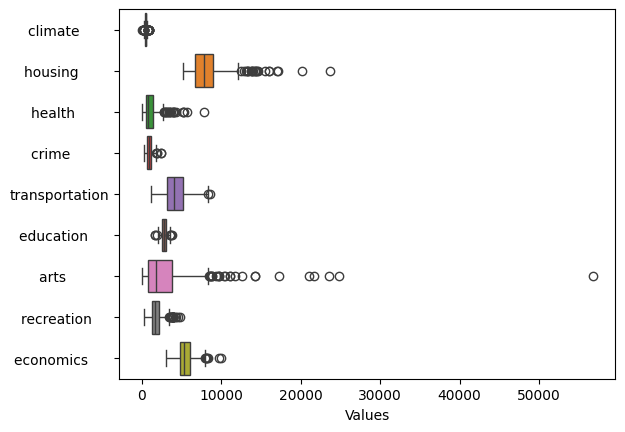

In [8]:
#  用seaborn畫盒鬚圖
import seaborn as sns
# plot boxplot
sns.boxplot(data=df, orient="h")
plt.xlabel('Values')
plt.show()

發現資料不一致，需要做標準化(前面用過了)

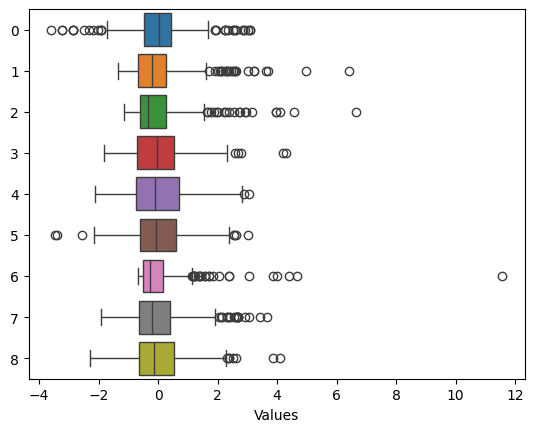

In [9]:
sns.boxplot(data=ratings_, orient="h")
plt.xlabel('Values')
plt.show()

## HW
做到範例3

### ex.2
9 項評比（9 個變數）資料是否彼此相關？彼此間的相關性有何差別？畫一張相關矩陣圖（correlation matrix）是分析多變量資料的基本動作。

<Axes: >

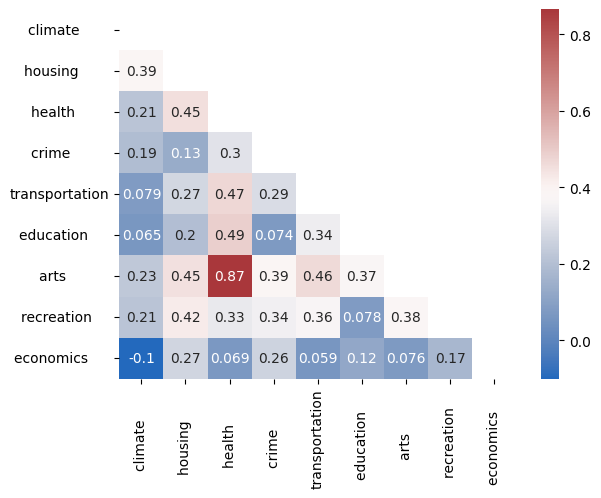

In [10]:
import seaborn
import pandas as pd
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')

health and art 有高度相關

In [14]:
import numpy as np
Sx_numpy = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ -  mu_x
# Tmp = ratings_ − np.tile(mu_x, (N, 1))
Sx_formula = Tmp.T @ Tmp / (N - 1)
print(Sx_formula)

[[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
   0.07590401  0.174059

In [18]:
# 進一步對樣本共變異矩陣 Sx_numpy 做特徵值與特徵向量分析（eigen analysis ）
# 並取得由大而小排列的特徵值及相對應特徵向量

from numpy.linalg import eig
w, v = eig(Sx_numpy)
idx = np.argsort(-w) #sort eigenvalues in descending order
# idx = np.argsort(w)[::−1]
eigvals = w[idx]
# 按照排序後的索引重新排列特徵向量
eigvecs = v[:, idx]
# 使用特徵值和特徵向量重建原始矩陣
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T # "@" 是矩陣乘法運算符

print(Sigma_x)

[[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
   0.07590401  0.174059

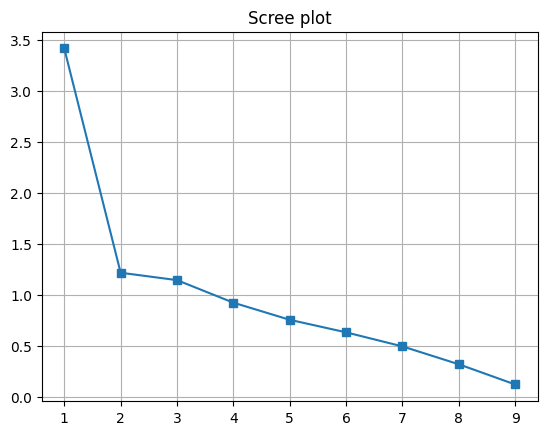

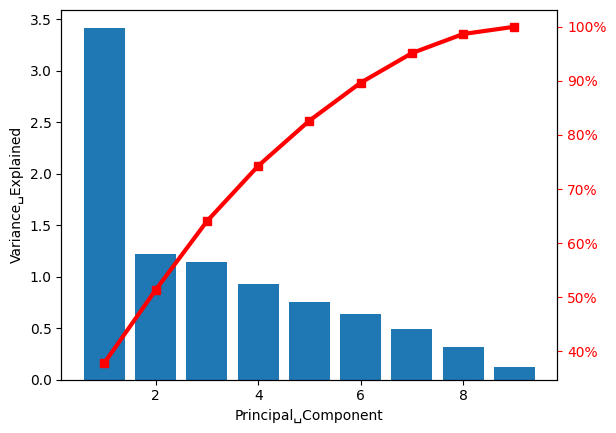

In [ ]:
from matplotlib.ticker import PercentFormatter
# 繪製 Scree plot
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()

# 繪製 累積解釋變異量
fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)

# 顯示累積解釋變異量(線)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3) # 紅色線為累積解釋變異量
ax2.tick_params(axis='y', colors='red') # 設定y軸顏色
ax2.yaxis.set_major_formatter(PercentFormatter()) # 設定y軸數值格式
ax.set_xlabel('Principal␣Component') 
ax.set_ylabel('Variance␣Explained')
plt.show()
